In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fruits:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5857%2F1166105%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240406%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240406T193753Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3d420e07e47bbdf70cd49b2588b683ff52afb6f6355d94a3634accf187b8ff815be2ddd307f5ed77e25c1f640787c275766c59e8dd2e45e3710c310788d8dd32c1e77761fcd2e692bd966a0d73b8d13135848142083547a6a952471ea0363495c436e02bf567dcb5738c8305cd302c2b3664b89c1cf6b7079f71a3bd596f0787fe7d0b6b522405c4aecff6cfe682d44f8a2660404ddea3aa606c317925e7d7d6a0967eb65429fb984e686397816d19ce1dcf1bf6eab3b5a5c7b285b9d3cbddda1c84f1e4e3821db07481b90bb3ff5d732a70f347438714bca1be910e0d0c0e9d179e6e2f035c4869ddef130bdee0db0dfc637b4283b2a5a5b15ea1254b30d064'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 796742678 bytes downloaded
Downloaded and uncompressed: fruits
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
import cv2

# import model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

#import warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/fruits/fruits-360/Test/Grape White/75_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/r_116_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/r_232_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/r_101_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/107_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/280_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/r_152_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/r_86_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/r_147_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/r_257_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/265_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/r_148_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/r_255_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/r_268_100.jpg
/kaggle/input/fruits/fruits-360/Test/Grape White/r_94_100.jpg
/kaggle/input/f

In [ ]:
train_dir = '/kaggle/input/fruits/fruits-360/Training/'
test_dir =  '/kaggle/input/fruits/fruits-360/Test/'

In [ ]:
fruits = []
fruits_image = []
for i in os.listdir(train_dir):
    for image_filename in os.listdir(train_dir + i):
        fruits.append(i) # name of the fruit
        fruits_image.append(i + '/' + image_filename) # image of the fruit

In [ ]:
train_fruits = pd.DataFrame(fruits, columns=["Fruits"])
train_fruits["Fruits Image"] = fruits_image

In [ ]:
fruits = []
fruits_image = []
for i in os.listdir(train_dir):
    for image_filename in os.listdir(test_dir + i):
        fruits.append(i) # name of the fruit
        fruits_image.append(i + '/' + image_filename) # image of the fruit

In [ ]:
fruitCountUnique = glob(train_dir + '/*' )
numberOfClass = len(fruitCountUnique)
print("How many different fruits are there  -->  ",numberOfClass)

How many different fruits are there  -->   131


In [ ]:
img = load_img(train_dir + "Cantaloupe 1/r_234_100.jpg")
array_image = img_to_array(img)
print("Image Shape --> ", array_image.shape)

Image Shape -->  (100, 100, 3)


In [ ]:
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.3,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


test_datagen = ImageDataGenerator(rescale= 1./255)
val_dataagen = ImageDataGenerator(rescale= 1./255,  validation_split = 0.6)

gen = ImageDataGenerator()

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size= array_image.shape[:2],
        batch_size = batch_size,
        subset = "training",
        color_mode= "rgb",
        class_mode= "categorical")

Found 67692 images belonging to 131 classes.


In [ ]:
val_generator = val_dataagen.flow_from_directory(
        test_dir,
        target_size= array_image.shape[:2],
        batch_size = batch_size,
        subset = "validation",
        color_mode= "rgb",
        class_mode= "categorical")

Found 13554 images belonging to 131 classes.


In [ ]:
test_generator = val_dataagen.flow_from_directory(
        test_dir,
        target_size= array_image.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22688 images belonging to 131 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.optimizers import RMSprop
from keras.regularizers import l2
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=array_image.shape, padding='same', kernel_regularizer=l2(0.0001)))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(0.0001)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.0001)))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.0001)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(0.0001)))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(0.0001)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=l2(0.0001)))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=l2(0.0001)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(numberOfClass))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(learning_rate=0.0001),
              metrics=["accuracy"])

model.summary()


# Train the model with early stopping
hist = model.fit_generator(
        generator=train_generator,
        steps_per_epoch=train_generator.n // batch_size,
        epochs=15,
        validation_data=val_generator,
        validation_steps=val_generator.n // batch_size,
        )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 activation_6 (Activation)   (None, 100, 100, 32)      0         
                                                                 
 batch_normalization_3 (Bat  (None, 100, 100, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 activation_7 (Activation)   (None, 100, 100, 32)      0         
                                                                 
 batch_normalization_4 (Bat  (None, 100, 100, 32)      128       
 chNormalization)                                     

In [ ]:
model.save('best_model.h5')

In [ ]:
from keras.models import load_model
model = load_model('best_model.h5')

In [ ]:
total_samples = train_generator.n+val_generator.n + test_generator.n
train_samples_perce = round(train_generator.n / total_samples * 100 )
val_samples_perce = round(val_generator.n/ total_samples * 100 )
test_samples_perce = round(test_generator.n / total_samples * 100 )

print(
    f'total samples: {total_samples}',
    f'train percent : {train_samples_perce}%',
    f'val percent : {val_samples_perce}%',
    f'test percent : {test_samples_perce}%',
    sep='\n'
)

total samples: 103934
train percent : 65%
val percent : 13%
test percent : 22%


In [ ]:
correct_predictions = []
misclassified_predictions = []

# Iterate over the test generator
for i in range(len(test_generator)):
    # Get a batch of images and labels
    batch_images, batch_labels = test_generator[i]

    # Make predictions
    predictions = model.predict(batch_images)

    # Get predicted labels
    predicted_labels = np.argmax(predictions, axis=1)

    # Get ground truth labels
    true_labels = np.argmax(batch_labels, axis=1)

    # Check which images are classified correctly and incorrectly
    for j in range(len(true_labels)):
        if predicted_labels[j] == true_labels[j]:
            correct_predictions.append((batch_images[j], predicted_labels[j]))
        else:
            misclassified_predictions.append((batch_images[j], predicted_labels[j], true_labels[j]))

    # Stop after finding 3 correct and 3 incorrect predictions
    if len(correct_predictions) >= 3 and len(misclassified_predictions) >= 3:
        break

labels = {y: x for x, y in train_generator.class_indices.items()}


1/1 [==============================] - 0s 48ms/step


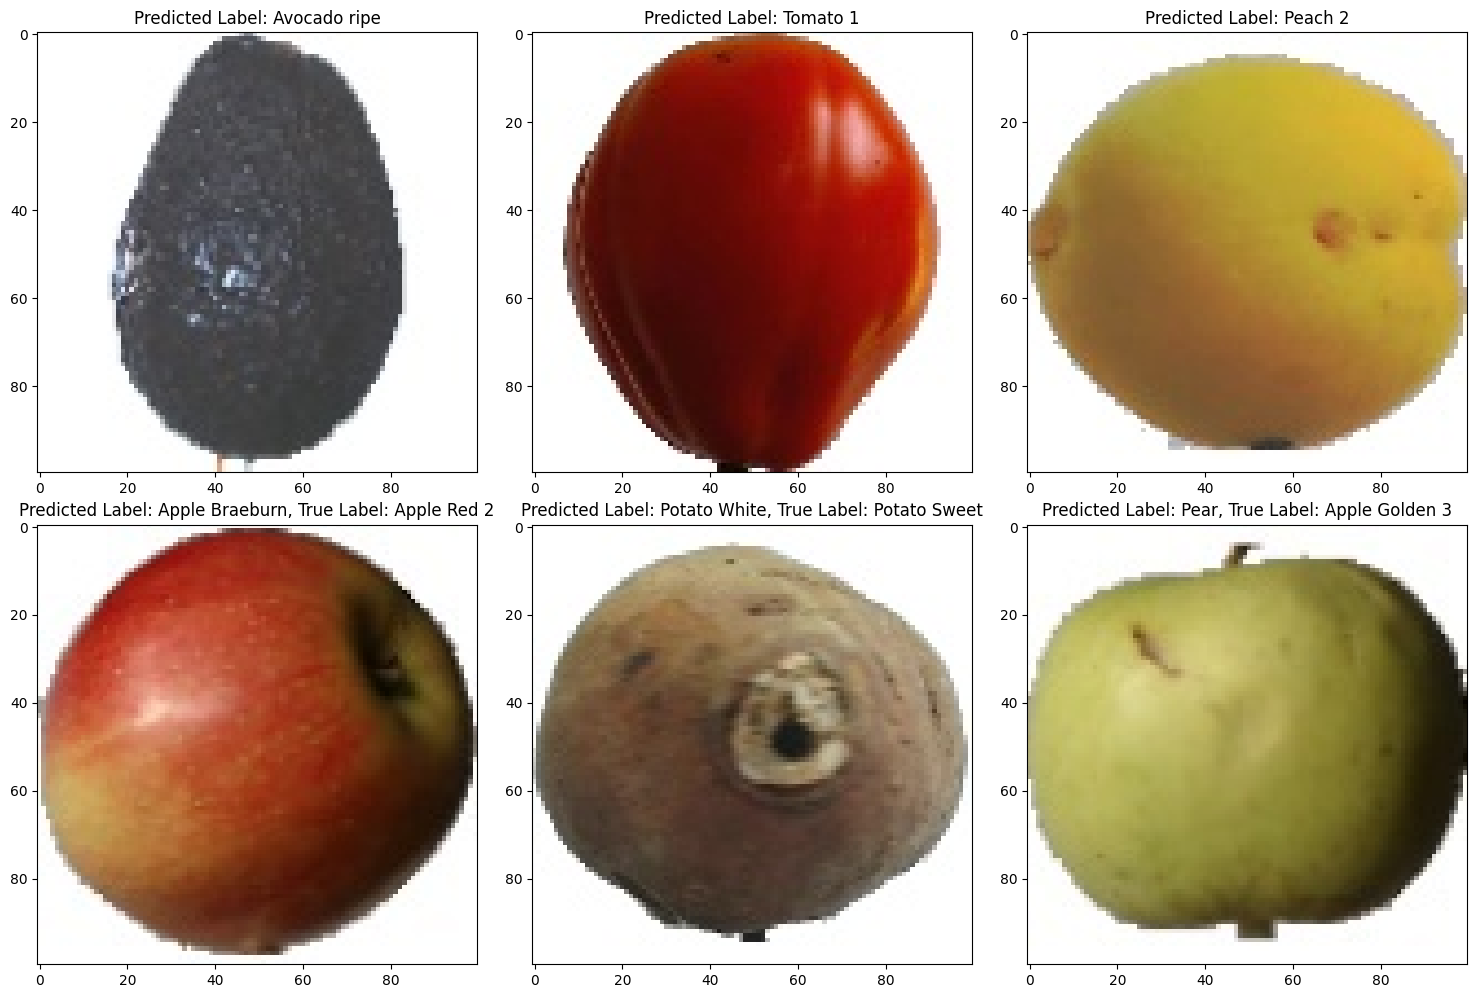

In [ ]:
import matplotlib.pyplot as plt

# Print images in a grid of two rows and three columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
# Print three correctly classified images
for i in range(3):
    image, label = correct_predictions[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(image)
    ax.set_title("Predicted Label: " + str(labels[label]))

# Print three misclassified images
for i in range(3):
    image, predicted_label, true_label = misclassified_predictions[i]
    ax = axes[1, i]
    ax.imshow(image)
    ax.set_title("Predicted Label: " + str(labels[predicted_label]) + ", True Label: " + str(labels[true_label]))

plt.tight_layout()
plt.show()


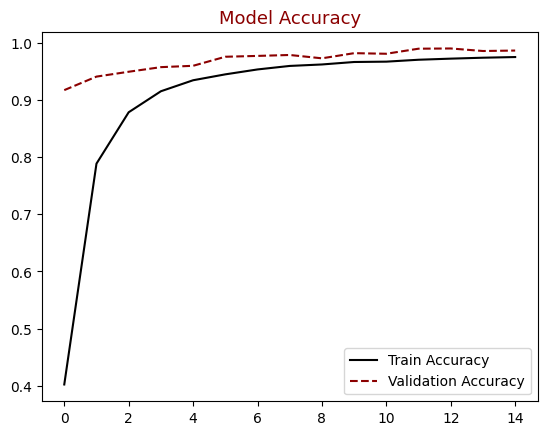

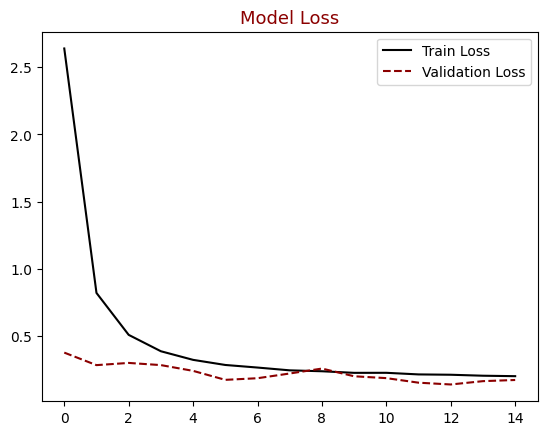

In [ ]:
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

There are overfitting afrer epoch 15 adding drop to the before last layer of 0.3 it didnt give a good results becuase of that I prefer to stop at 14 epocs

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

709/709 [==============================] - 23s 29ms/step - loss: 0.2702 - accuracy: 0.9763
Validation Loss: 0.27021855115890503
Validation Accuracy: 0.9763311147689819


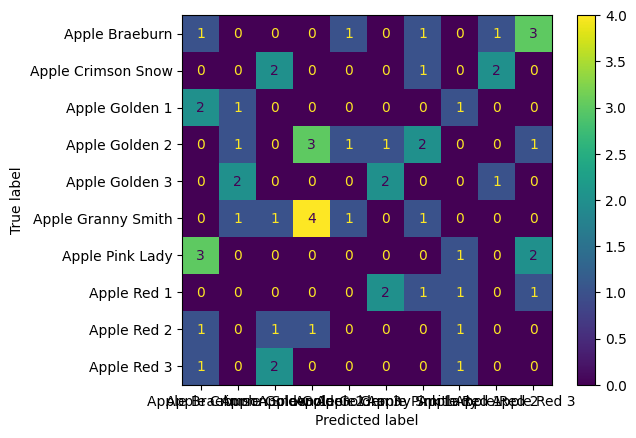

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the class indices for the three classes you want to consider
class_indices = [0, 1, 2,3,4,5,6,7,8,9]  # Assuming you want to consider the first three classes

# Get the class labels for the selected indices
class_labels = [labels[index] for index in class_indices]

# Filter true classes and predictions to consider only the selected classes
mask = np.isin(true_classes, class_indices)
true_classes_filtered = true_classes[mask]
y_pred_classes_filtered = y_pred_classes[mask]

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes_filtered, y_pred_classes_filtered, labels=class_indices)

# Plot confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
cm_display.plot()
plt.show()
